<a href="https://colab.research.google.com/github/LawalIbraheem19/Machine-Learning/blob/main/AutoMPG_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Auto MPG Data

Source: This dataset was taken from the Statlib library, which is maintained by THe Carnegie Melon University

Number of attributes: Nine attributes including the class attributes

Attribute information:
MPG: Continuous
Cylinder: Multi-Value Discrete
Displacement: Continuous
Horsepower: Continuous
Weight: Continuous
Acceleration: Continuous
Model Year: Multi-Valued Discrete
Origin: Multi-Valued Discrete
Car name: String(Unique for each instance)


Missing Attributes Values: Horspower has 6 missing values

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib #provides a readable way build patches
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from __future__ import absolute_import, division,print_function, unicode_literals

 http://archive.ics.uci.edu/dataset/9/auto+mpg

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data = data.dropna()
data = data.drop(['car name'], axis=1)
#origin column is categorical so we one hot encode
origin = data.pop('origin')
data['USA'] = (origin== 1)*1.0
data['Europe'] = (origin== 2)*1.0
data['Japan'] = (origin== 3)*1.0

In [ ]:
data['horsepower'] = data['horsepower'].replace(to_replace = "?", value = 0)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [ ]:
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

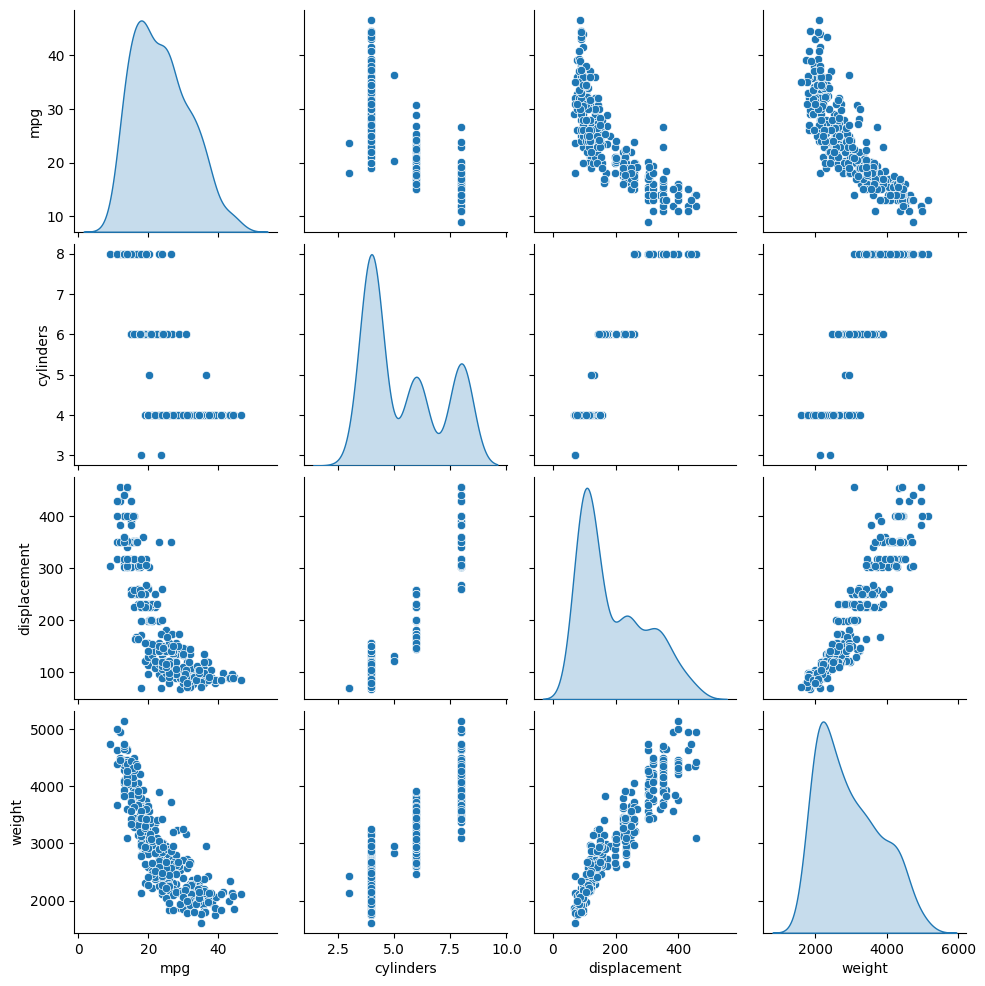

In [ ]:
#Multivariate Analysis
sns.pairplot(train_data[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind ='kde')

In [ ]:
train_stats = train_data.describe()
train_stats.pop('mpg')

count    318.000000
mean      23.748113
std        7.958428
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,318.0,5.440252,1.685309,3.0,4.000,4.0,7.5,8.0
displacement,318.0,192.451258,104.802315,68.0,102.000,146.0,259.5,455.0
horsepower,318.0,102.613208,40.136810,0.0,75.000,92.5,120.0,230.0
weight,318.0,2954.833333,855.579657,1613.0,2207.500,2750.0,3608.0,5140.0
acceleration,318.0,15.577673,2.754206,8.0,13.925,15.5,17.2,24.8
model year,318.0,76.050314,3.706587,70.0,73.000,76.0,79.0,82.0
USA,318.0,0.613208,0.487783,0.0,0.000,1.0,1.0,1.0
Europe,318.0,0.182390,0.386774,0.0,0.000,0.0,0.0,1.0
Japan,318.0,0.204403,0.403900,0.0,0.000,0.0,0.0,1.0


In [ ]:
train_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
174,18.0,6,171.0,97,2984,14.5,75,1.0,0.0,0.0
359,28.1,4,141.0,80,3230,20.4,81,0.0,1.0,0.0
250,19.4,8,318.0,140,3735,13.2,78,1.0,0.0,0.0
274,20.3,5,131.0,103,2830,15.9,78,0.0,1.0,0.0
283,20.2,6,232.0,90,3265,18.2,79,1.0,0.0,0.0


In [ ]:
train_labels = train_data.pop('mpg')
test_labels = test_data.pop('mpg')

In [ ]:
train_labels.head()

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
Name: mpg, dtype: float64

In [ ]:
def normalization(x):
    return (x - train_stats['mean'])/train_stats['std']

In [ ]:
train_norm = normalization(train_data)
test_norm = normalization(test_data)

In [ ]:
train_norm.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
174,0.332134,-0.204683,-0.139852,0.034090,-0.391283,-0.283364,0.792960,-0.471567,-0.506072
359,-0.854592,-0.490936,-0.563403,0.321614,1.750895,1.335376,-1.257132,2.113921,-0.506072
250,1.518860,1.197958,0.931484,0.911857,-0.863288,0.526006,0.792960,-0.471567,-0.506072
274,-0.261229,-0.586354,0.009637,-0.145905,0.117031,0.526006,-1.257132,2.113921,-0.506072
283,0.332134,0.377365,-0.314255,0.362522,0.952117,0.795796,0.792960,-0.471567,-0.506072


In [ ]:
def model_build():
    model = keras.Sequential([
        layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train_data.keys())]),
        layers.Dense(64, activation = tf.nn.relu),
        layers.Dense(1)

    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics= ['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
model = model_build()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
example_batch = train_norm[:10]

In [ ]:
example_pred = model.predict(example_batch)
example_pred

1/1 [==============================] - 0s 306ms/step


array([[-0.00418689],
       [-0.22499776],
       [ 0.26797628],
       [-0.25634727],
       [-0.16430283],
       [ 0.19052516],
       [-0.2998977 ],
       [-0.05361436],
       [ 0.14109744],
       [ 0.23014408]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
             print("")
        print(".", end= " ")
#Number of epochs
EPOCHS = 1000

In [ ]:
#train model
history = model.fit(
    train_norm , train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()]
)


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [ ]:
#lets check loss, mean absolute error, mean square error, val loss, val mean squared error
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.468951,0.944617,2.468951,7.186467,2.065733,7.186467,995
996,2.208322,0.929964,2.208322,7.822445,2.163129,7.822445,996
997,2.416323,0.954871,2.416323,8.361952,2.178655,8.361952,997
998,2.578001,0.987943,2.578001,7.163109,2.069292,7.163109,998
999,2.399774,0.916855,2.399774,7.474726,2.107789,7.474726,999


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label= 'Train Error' )
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label= 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label= 'Train Error' )
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label= 'Val Error')
    plt.ylim([0,10])
    plt.legend()

    plt.show()

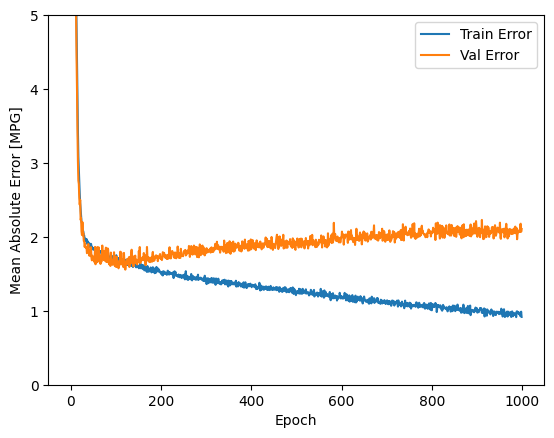

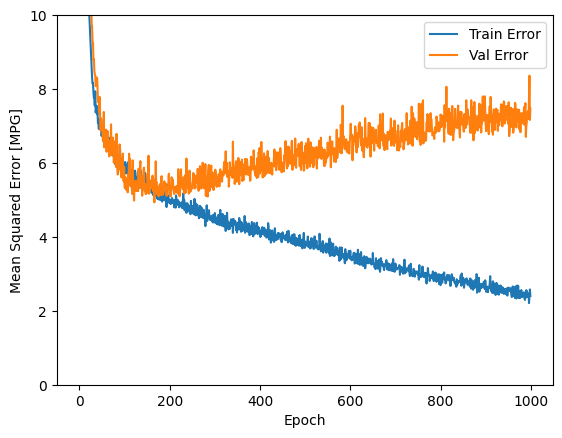

In [ ]:
#plot train and validation loss
plot_history(history)


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . 

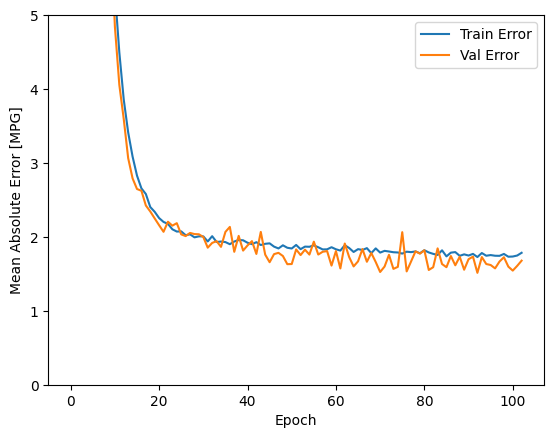

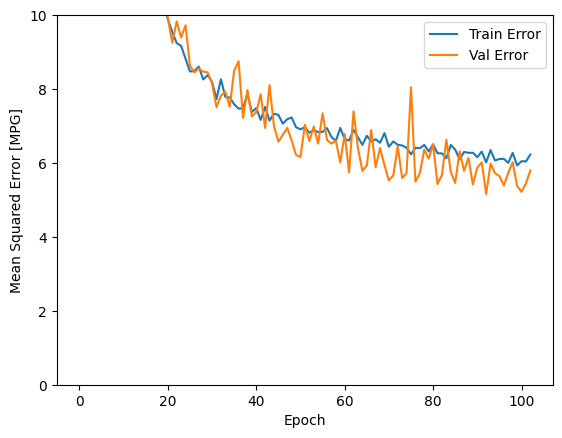

In [ ]:
model = model_build()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_norm, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(test_norm, test_labels)
print("Testing dataset Mean Absolute Error (MAE): {:5.2f}MPG" .format(mae))

3/3 [==============================] - 0s 5ms/step - loss: 10.4973 - mean_absolute_error: 2.2340 - mean_squared_error: 10.4973
Testing dataset Mean Absolute Error (MAE):  2.23MPG


In [ ]:
test_predictions = model.predict(test_norm).flatten()

3/3 [==============================] - 0s 3ms/step


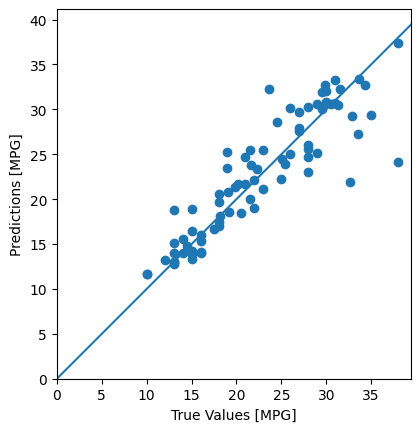

In [ ]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1 ]])
_,plt.plot([-100, 100], [-100, 100])
plt.show()

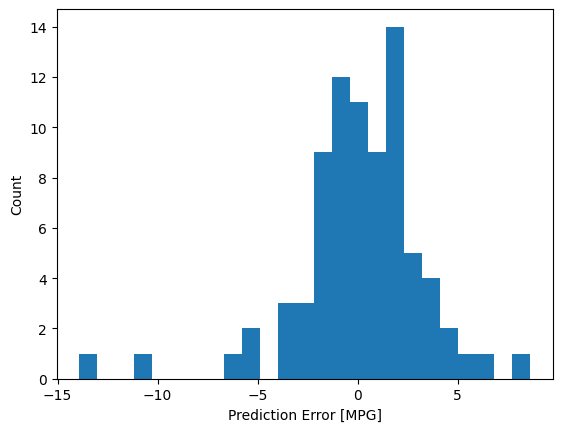

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

In [ ]:
model.save('AutoMPG model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

newmodel = tf.keras.models.load_model('AutoMPG model.h5')

In [ ]:
test_pred = newmodel.predict(test_norm).flatten()

3/3 [==============================] - 0s 4ms/step


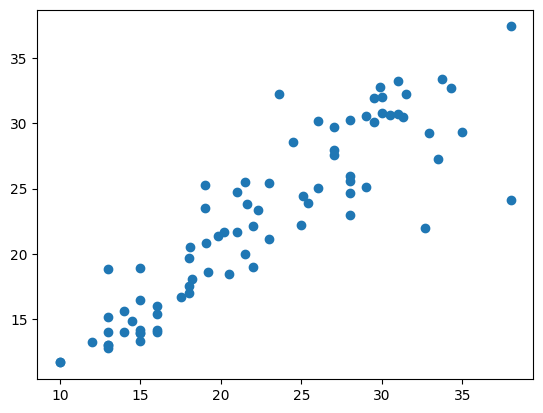

In [ ]:
plt.scatter(test_labels, test_pred)
plt.show()